# Проект: Линейные модели в машинном обучении

## Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

## Описание данных

1. Файл **ferma_main.csv** содержит данные о стаде фермера на текущий момент. Описание данных:
    - `id` — уникальный идентификатор коровы.
    - `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
    - `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
    - `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
    - `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
    - `Порода` — порода коровы.
    - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    - `порода папы_быка` — порода папы коровы.
    - `Жирность,%` — содержание жиров в молоке (в процентах).
    - `Белок,%` — содержание белков в молоке (в процентах).
    - `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (`вкусно`, `не вкусно`).
    - `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).
    
    Признаки в датасете `ferma_main.csv` можно разделить на группы.
    
    - Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`.
    - Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.
    - Характеристика пастбища: `Тип пастбища`.
    - Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.
    
    Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.
    
    
2. Файл **ferma_dad.csv** хранит имя папы каждой коровы в стаде фермера. Описание данных:
    - `id` — уникальный идентификатор коровы.
    - `Имя Папы` — имя папы коровы.
    
    
3. Файл **cow_buy.csv** — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
    - `Порода` — порода коровы.
    - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    - `порода папы_быка` — порода папы коровы.
    - `Имя_папы` — имя папы коровы.
    - `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
    - `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
    - `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).
    
    Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей.
    
    - Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
    - Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

## Загрузка данных

In [1]:
 !pip install phik -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import numpy as np
import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)
from sklearn.linear_model import LogisticRegression

In [3]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

##  Предобработка данных

- #### Работа с датафреймом ferma_main

Изучим датафрейм и общую информацию о нем

In [4]:
ferma_main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [5]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

Некоторые названия столбцов выглядят очень громоздко, а также отсутствует соблюдение единого стиля написания. Необходимо это исправить.

In [6]:
ferma_main = ferma_main.rename(columns={'ЭКЕ (Энергетическая кормовая единица)': 'ЭКЕ', 'СПО (Сахаро-протеиновое соотношение)': 'СПО', 'порода папы_быка': 'Порода папы быка'})
ferma_main.columns = ferma_main.columns.str.lower()
ferma_main.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Исходя из общей информации о датафрейме и соответствии количеству строк в каждом столбце общему количеству строк, можно сказать, об отсутствии пропусков. 

Проверим датафрейм на наличие явных дубликатов и удалим при наличии.

In [7]:
# Проверка на наличие явнях полных дубликатов
ferma_main.duplicated().sum()

5

In [8]:
# Удаление полных явных дубликатов 
ferma_main = ferma_main.drop_duplicates(keep='first').reset_index(drop=True)
# Проверка
ferma_main.duplicated().sum()

0

In [9]:
ferma_main.shape

(629, 12)

Осуществим проверку на наличие неявных дубликатов и устраним их при наличии.

In [10]:
for named in ['порода', 'тип пастбища', 'порода папы быка', 'вкус молока', 'возраст']:
    print(f'Уникальные значения для столбца \'{named}\'')
    print(ferma_main[named].unique(), '\n')

Уникальные значения для столбца 'порода'
['Вис Бик Айдиал' 'РефлешнСоверинг'] 

Уникальные значения для столбца 'тип пастбища'
['Равнинное' 'Равнинные' 'Холмистое'] 

Уникальные значения для столбца 'порода папы быка'
['Айдиал' 'Соверин' 'Айдиалл'] 

Уникальные значения для столбца 'вкус молока'
['вкусно' 'не вкусно'] 

Уникальные значения для столбца 'возраст'
['более_2_лет' 'менее_2_лет'] 



In [11]:
# Замена значений в столбце 'Тип пастбища'
ferma_main['тип пастбища'] = ferma_main['тип пастбища'].replace('Равнинные', 'Равнинное')

# Замена значений в столбце 'Порода папы быка'
ferma_main['порода папы быка'] = ferma_main['порода папы быка'].replace('Айдиалл', 'Айдиал')

# Проверка
for named in ['тип пастбища', 'порода папы быка']:
    print(f'Уникальные значения для столбца \'{named}\'')
    print(ferma_main[named].unique(), '\n')

Уникальные значения для столбца 'тип пастбища'
['Равнинное' 'Холмистое'] 

Уникальные значения для столбца 'порода папы быка'
['Айдиал' 'Соверин'] 



In [12]:
ferma_main['тип пастбища'] = ferma_main['тип пастбища'].str.lower()
ferma_main['тип пастбища'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [13]:
# Еще раз проверим на наличие явных полных дубликатов, которые могли появиться после устранения неявных дубликатов
ferma_main.duplicated().sum()

0

- #### Работа с датафреймом ferma_dad

Изучим датафррейм и общую информацию о нем.

In [14]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [15]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Пропусков нет. Типы данных верны. Количество коров в данном датафрейме соответсвует количеству коров в предыдущем датафрейме, значит информация о папе есть для каждой коровы, однако проверим на наличие дубликатов.

In [16]:
# Проверка на наличие явных полных дубликатов
ferma_dad.duplicated().sum()

0

In [17]:
# Проверка на наличие неявных дубликатов
ferma_dad['Имя Папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [18]:
# Поменяем регистр названий столбцов
ferma_dad.columns = ferma_dad.columns.str.lower()
ferma_dad.columns

Index(['id', 'имя папы'], dtype='object')

- #### Работа с датафреймом cow_buy

In [19]:
cow_buy.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [20]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [21]:
# Поменяем название столбца 
cow_buy = cow_buy.rename(columns={'порода папы_быка': 'порода папы быка', 'Имя_папы': 'имя папы'})
cow_buy.columns = cow_buy.columns.str.lower()
cow_buy.head()

,порода,тип пастбища,порода папы быка,имя папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Исходя из полученной информации о датафрейме, мы можем сказать что пропуски в нем отсутствуют, а типы данных, определенных библиотекой пандас соответсвуют действительности.

Проводить проверку на наличие дубликатов не будем, так как в датасете мало признаков, категорий тоже немного - вероятность повторов ненулевая, и в случае сомнения нам выгоднее оставить здесь дубликаты, нежели их удалить. Эта таблица в обучении моделей не участвует, поэтому дубликаты не критичны.

In [22]:
cow_buy.shape

(20, 7)

In [23]:
# Проверка на наличие неявных дубликатов
for named in ['порода', 'тип пастбища', 'порода папы быка', 'имя папы', 'возраст']:
    print(f'Уникальные значения для столбца \'{named}\'')
    print(cow_buy[named].unique(), '\n')

Уникальные значения для столбца 'порода'
['Вис Бик Айдиал' 'РефлешнСоверинг'] 

Уникальные значения для столбца 'тип пастбища'
['холмистое' 'равнинное'] 

Уникальные значения для столбца 'порода папы быка'
['Айдиал' 'Соверин'] 

Уникальные значения для столбца 'имя папы'
['Геркулес' 'Буйный' 'Барин' 'Соловчик'] 

Уникальные значения для столбца 'возраст'
['более_2_лет' 'менее_2_лет'] 



## Исследовательский анализ данных

- Исследование датафрейма ferma_main

In [24]:
ferma_main.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [25]:
# Функция для исследования количественных признаков
def quantitative_signs(df, col):
    df[col].hist(bins=15, figsize=(8, 8), color='orange')
    plt.title(f'Распределение для столбца \'{col}\'')
    plt.xlabel('Соответствующая единица измерения')
    plt.ylabel('Количество')
    plt.show()
    print(f'Описание данных для столбца {col}:\n{df[col].describe()}')

In [26]:
# Функция для исследования категориальных признаков
def categorical_signs(df, col):
    df[col].value_counts().plot.bar(figsize=(8, 8))
    plt.title(f'Распределение для столбца \'{col}\'')
    plt.ylabel('Количество')
    plt.show()

In [27]:
# Функция для разделения столбцов с категориальными и количественными переменными с целью исследования и построения графиков
def research_analysis(df):
    column_types = dict(df.dtypes)
    for name, dtype in column_types.items():
        if name != 'id': 
            if dtype == 'int64' or dtype == 'float64':
                quantitative_signs(df, name)
            else:
                categorical_signs(df, name)

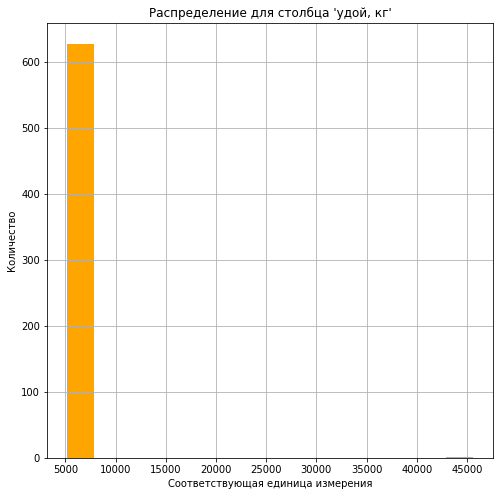

Описание данных для столбца удой, кг:
count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой, кг, dtype: float64


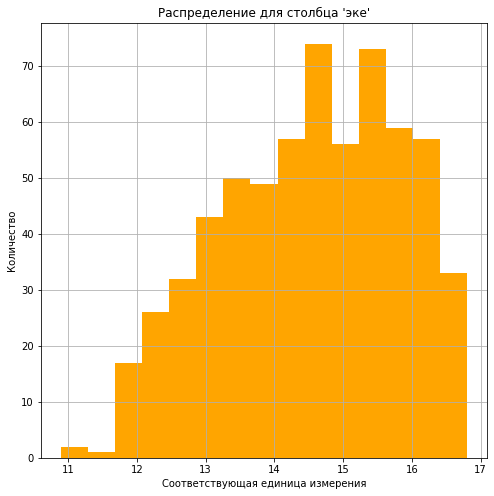

Описание данных для столбца эке:
count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64


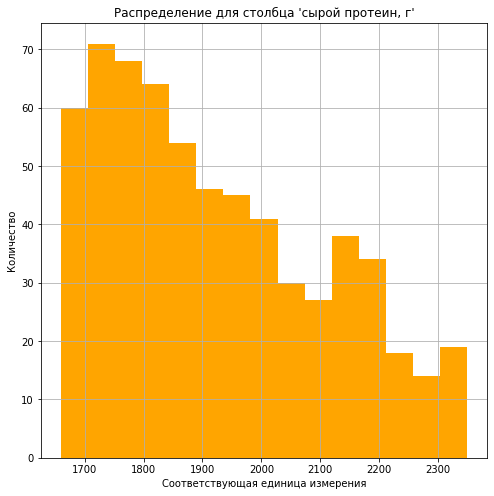

Описание данных для столбца сырой протеин, г:
count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: сырой протеин, г, dtype: float64


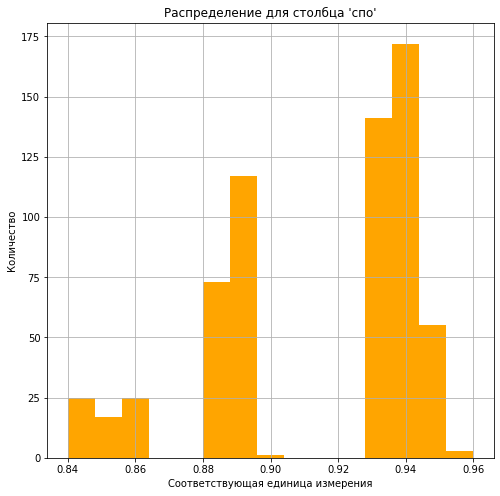

Описание данных для столбца спо:
count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64


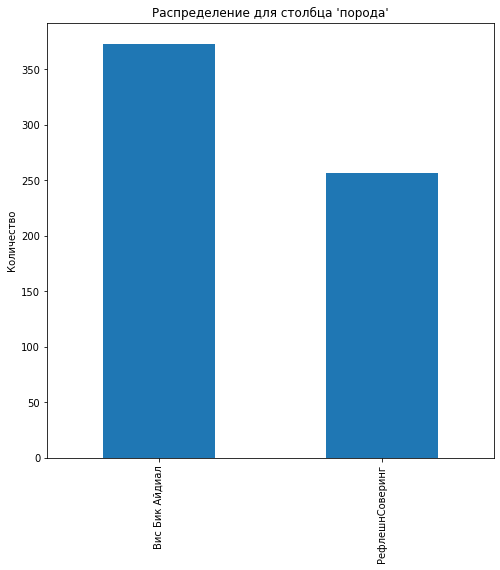

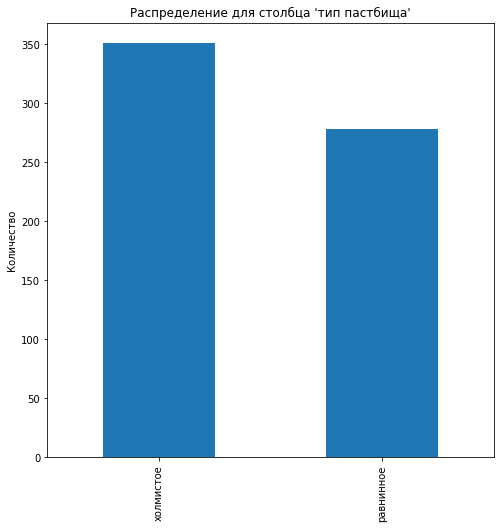

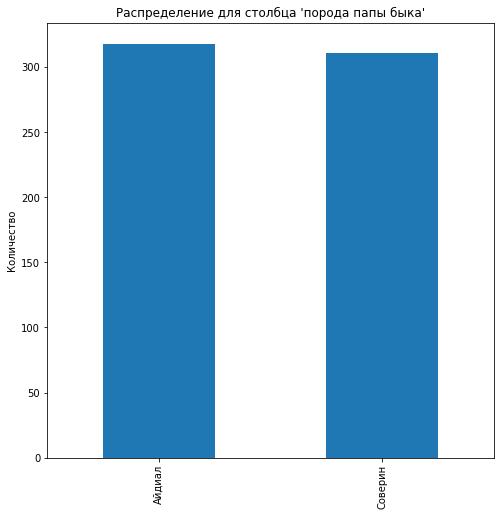

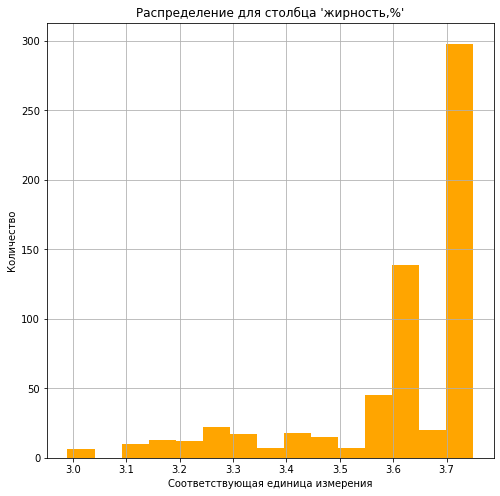

Описание данных для столбца жирность,%:
count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность,%, dtype: float64


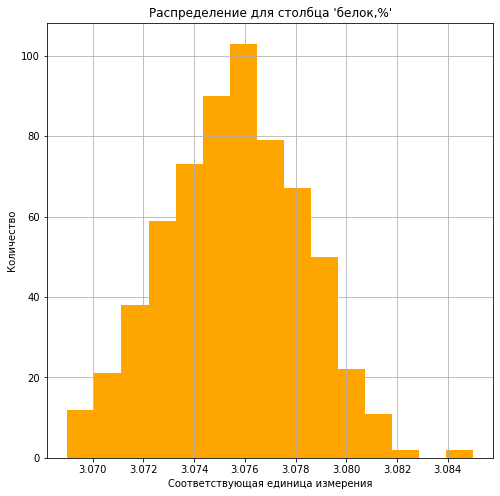

Описание данных для столбца белок,%:
count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок,%, dtype: float64


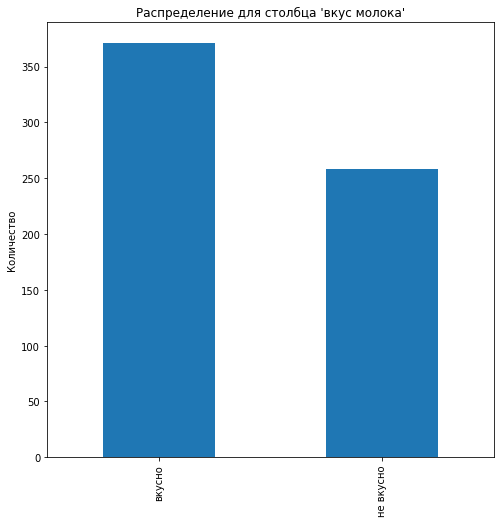

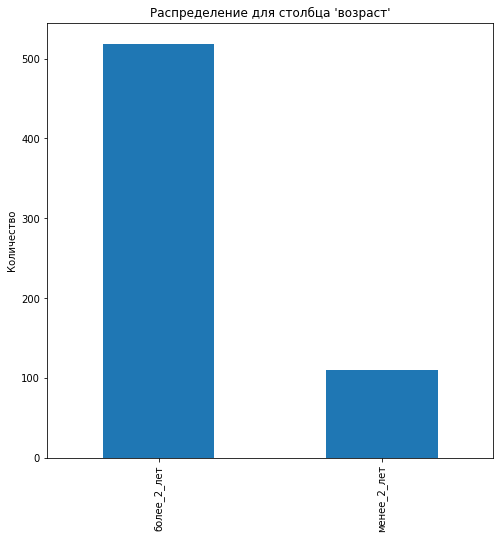

In [28]:
research_analysis(ferma_main)

По итогу общего исследовательского анализа важно обратить внимание на наличие выброса в столбце с количеством удоя в кг. 

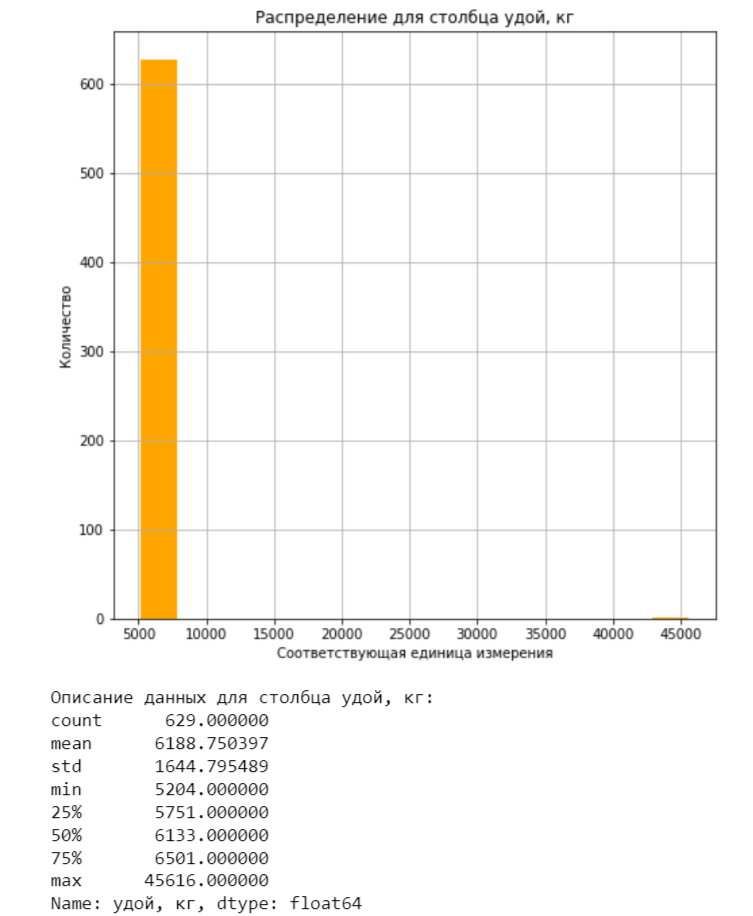

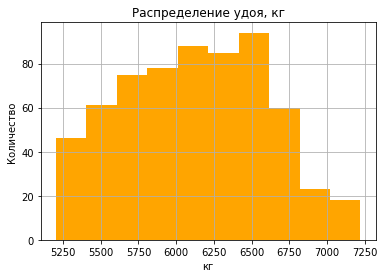

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, кг, dtype: float64

In [29]:
# Избавляемся от выброса
ferma_main = ferma_main[ferma_main['удой, кг'] < 45000]
ferma_main['удой, кг'].hist(color='orange')
plt.title('Распределение удоя, кг')
plt.xlabel('кг')
plt.ylabel('Количество')
plt.show()
ferma_main['удой, кг'].describe()

Теперь распределние удоя выглядит нормально.

Также обратим внимание на диаграмму распределения для столбца 'спо'. 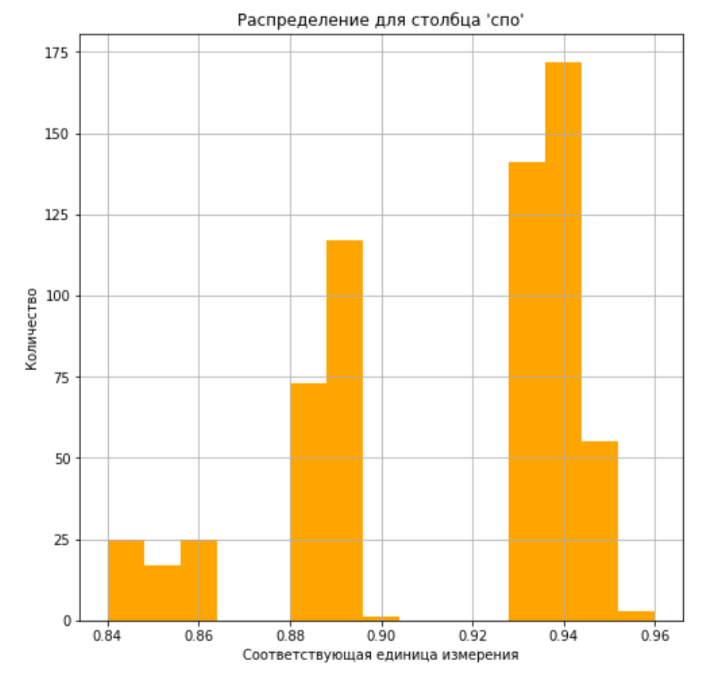


Наблюдается "концентрация" спо определенных значений в дипазонах от 0.84 до 0.867, от 0.88 до 0.904 и от 0.929 до 0.96. Это может быть связано с тем, что могут существовать определенные стандарты по содержанию сахара в корме (относительно протеина) коров каждой отдельной категории. 

На диаграмме распределения процента жирности наблюдается два пика, то есть данное распределение нормальным не является. 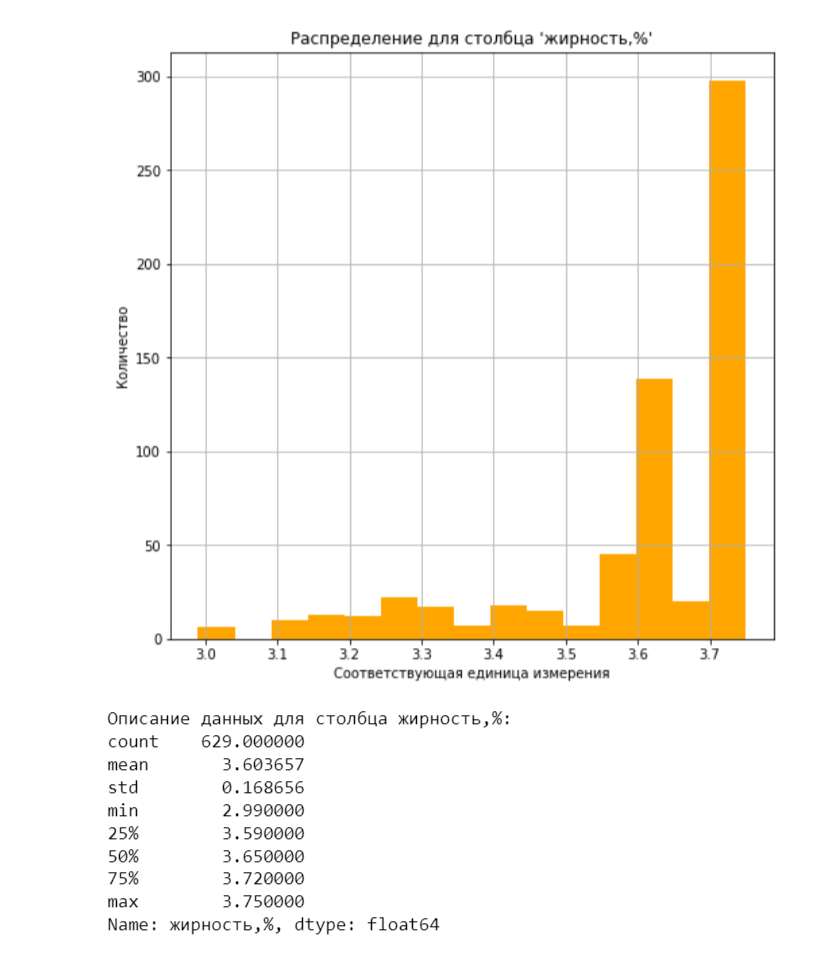

В остальных случаях распределения носят нормальный характер с возможными сдвигами вправо и влево.

- Исследование датафрейма cow_buy 

In [30]:
cow_buy.head()

,порода,тип пастбища,порода папы быка,имя папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


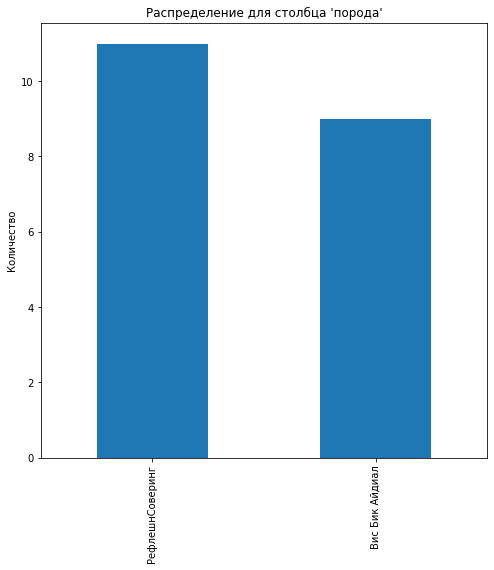

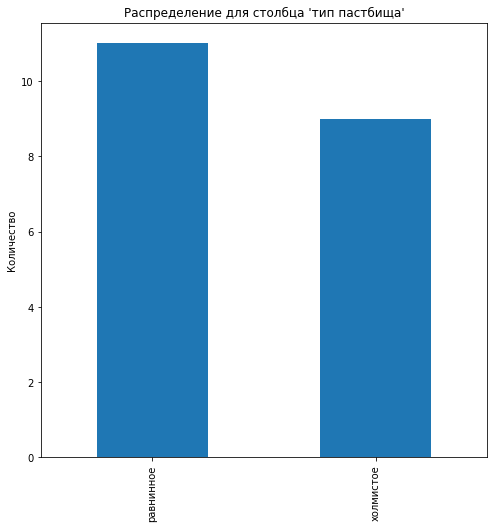

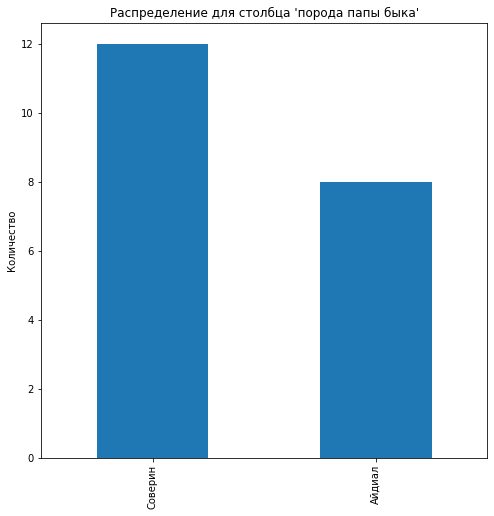

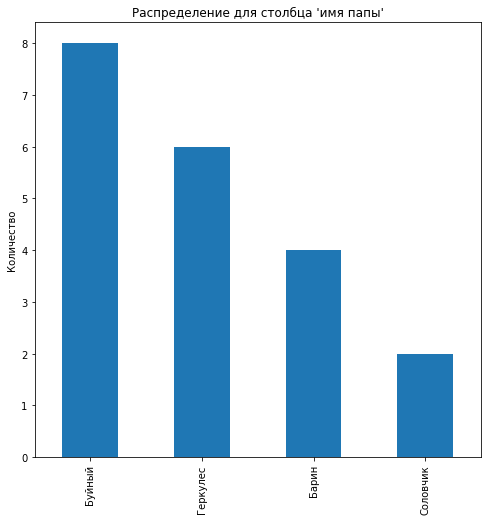

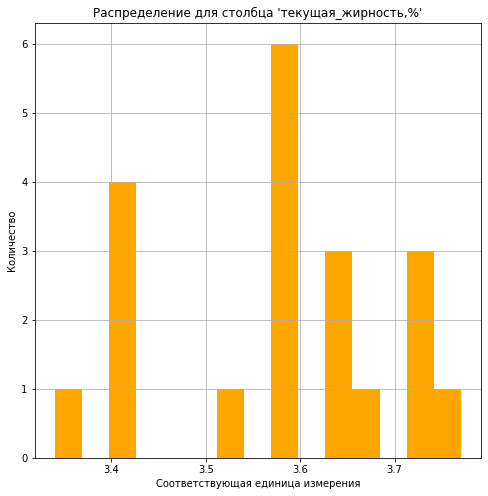

Описание данных для столбца текущая_жирность,%:
count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: текущая_жирность,%, dtype: float64


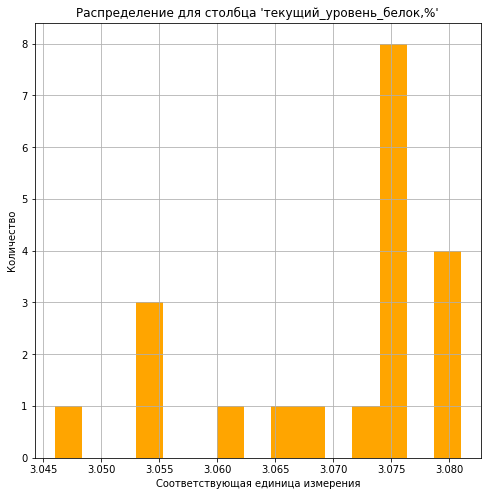

Описание данных для столбца текущий_уровень_белок,%:
count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: текущий_уровень_белок,%, dtype: float64


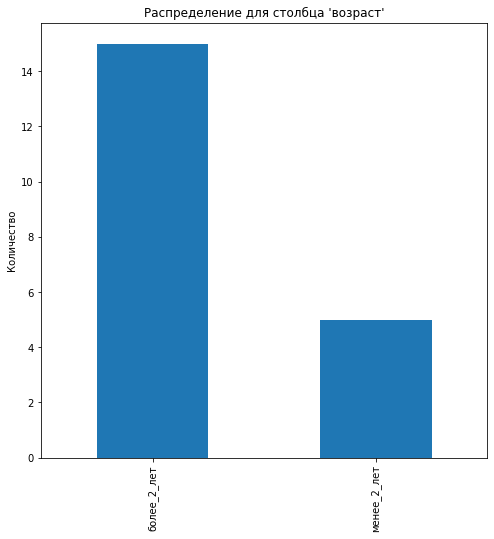

In [31]:
research_analysis(cow_buy)

При изучении результатов исследовательского анализа датафрейма cow_buy можно заметить отсутствие нормального распределения значений для столбцов с информацией о текущей жирности и текущем уровне белка в молоке. Однако это объяснимо тем, что у нас не хватает данных, чтобы они распределились нормально. По тому, что видим, аномалий нет и распределение при увеличении числа наблюдений скорее всего должно стремиться к нормальному.
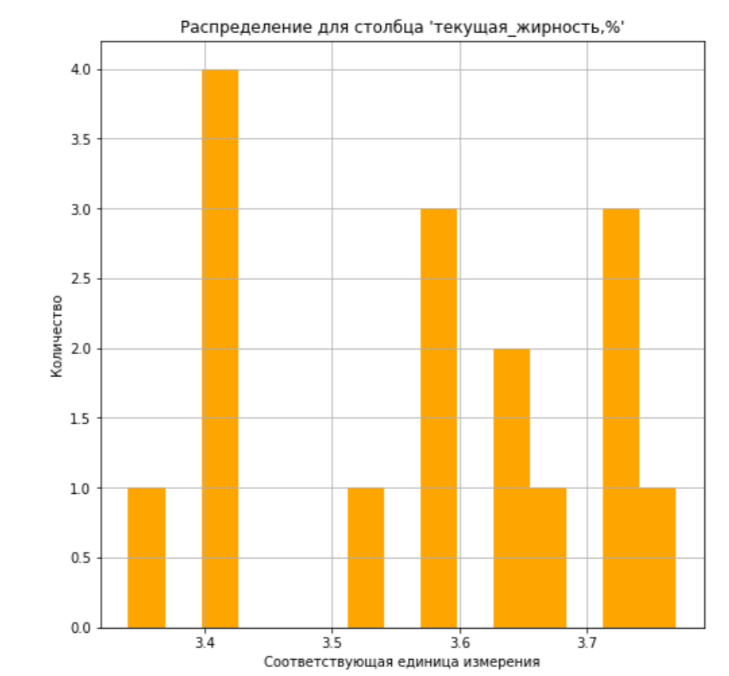 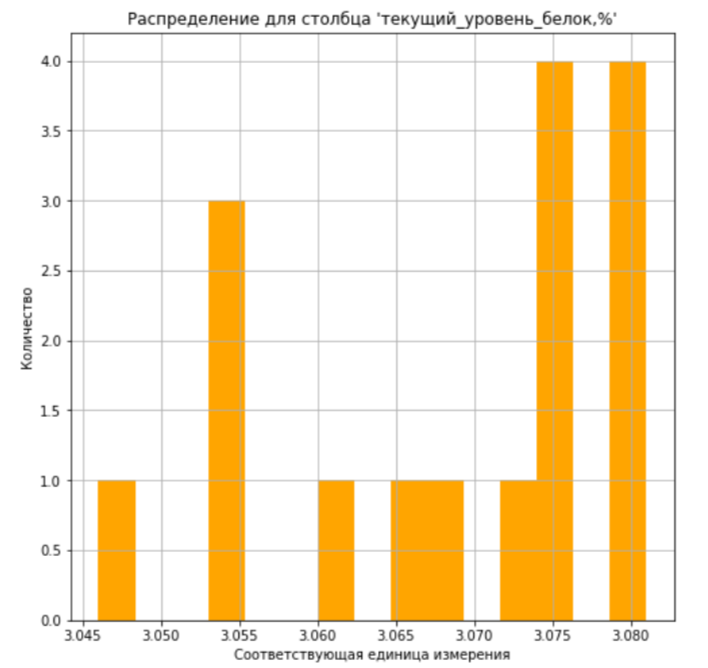

## Корреляционный анализ

1. Изучим взаимосвязь между признаками датафрейма ferma_main: рассчитаем коэффициенты корреляции между всеми признаками.

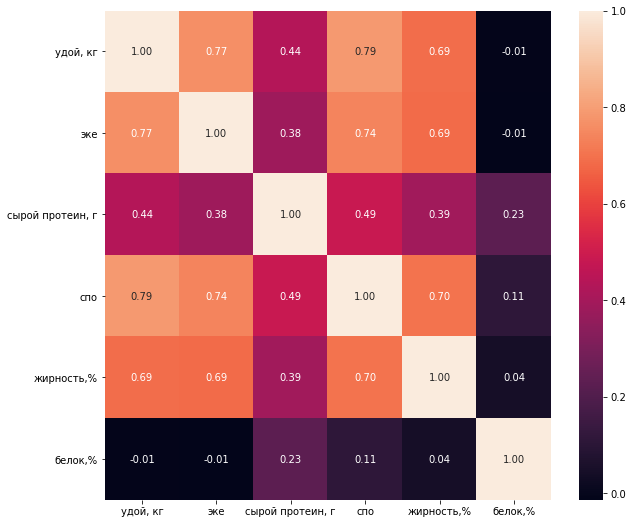

In [32]:
plt.figure(figsize=(10, 9))
sns.heatmap(ferma_main.drop('id', axis=1).corr(method='spearman'), annot=True, fmt='.2f')
plt.show()

interval columns not set, guessing: ['удой, кг', 'эке', 'сырой протеин, г', 'спо', 'жирность,%', 'белок,%']


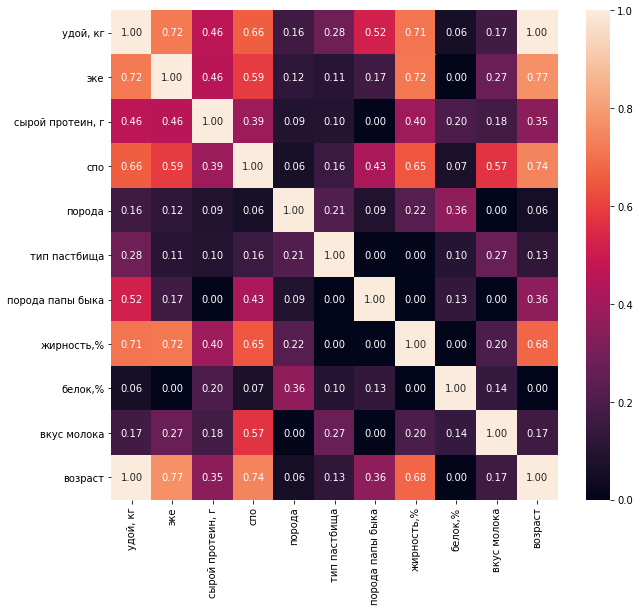

In [33]:
plt.figure(figsize=(10, 9))
sns.heatmap(ferma_main.drop('id', axis=1).phik_matrix(), annot=True, fmt='.2f')
plt.show()

Рассмотрев хитмэп с коэффициентами корреляции, можно сделать следующие выводы о взаимосвязи между целевыми и входными признаками: целевой признак - **удой, кг** - имеет 
- **высокую** зависимость от **эке и спо**
- **среднюю** зависимость от **жирности**
- **низкую** зависимость от **сырого протеина**

**ЭКЕ (Энергетическая кормовая единица)** имеет:
- **высокую** зависимость от **спо**, то есть, фактически, прямую зависимость от сахара в корме коровы
- **слабую** зависимость от **сырого протеина**

**Сырой протеин, г** имеет слабые зависимости от других входных признаков. 

**СПО** имеет слабую зависимость от **сырого протена, г**.

**Жирность,%**, то есть **содержание жиров в молоке** (в процентах), имеет **среднюю зависимость от ЭКЕ и СПО**. 

**Белки**, в свою очередь, не зависят ни от чего, то есть не имеют линейных связей.

**Мультиколлинеарность не наблюдается.**

2. Построим диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

In [34]:
# Распределение столбцов по типам данных
def distribution_by_data_types(df):
    quantitative_columns = []
    categorical_columns = []
    
    for name, dtype in df.dtypes.items():
        if name != 'id': 
            if dtype == 'int64' or dtype == 'float64':
                quantitative_columns.append(name)  
            else:
                categorical_columns.append(name) 
    
    return quantitative_columns, categorical_columns

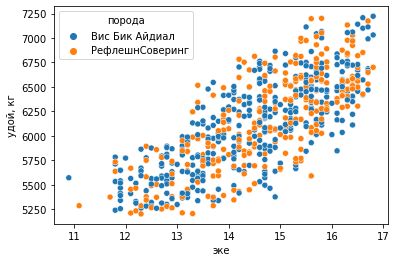

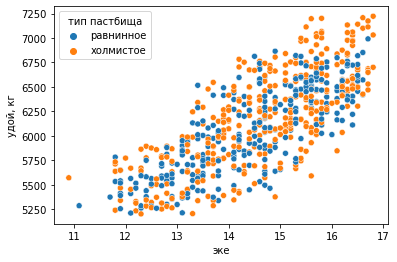

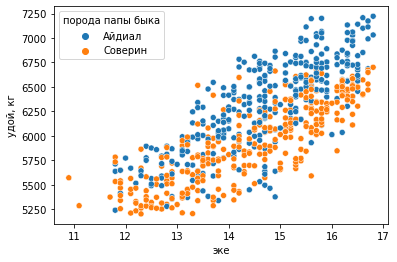

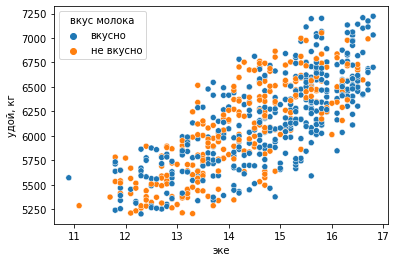

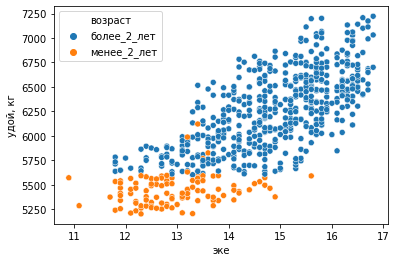

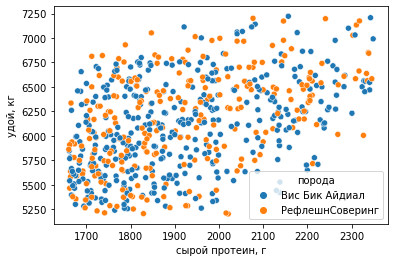

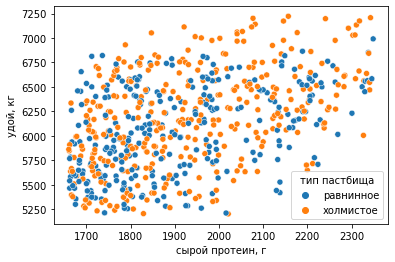

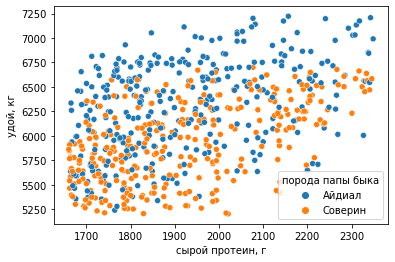

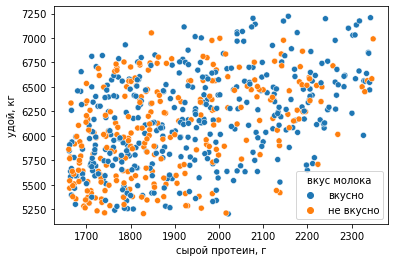

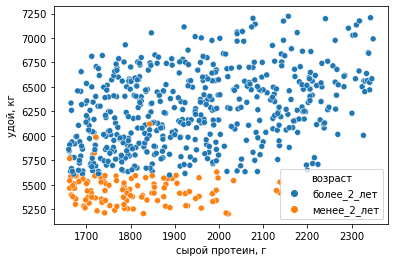

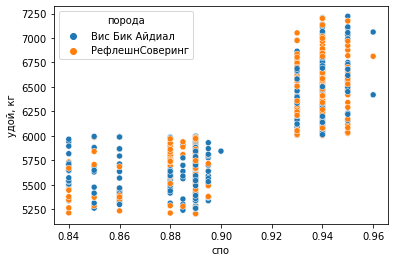

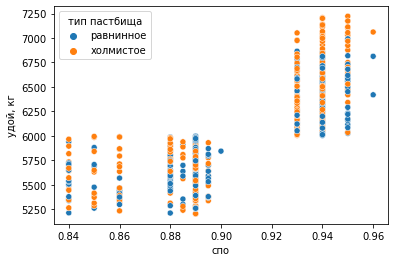

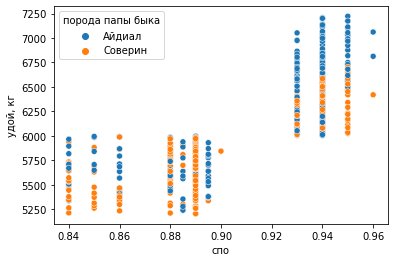

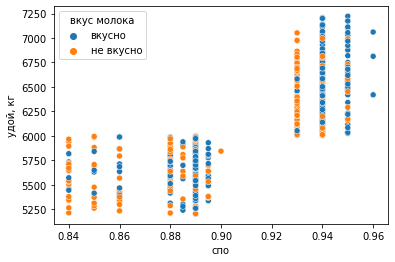

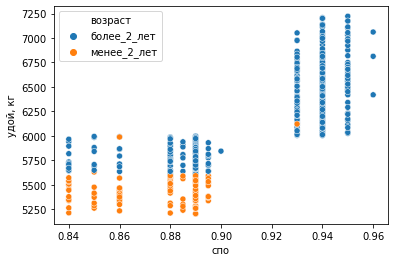

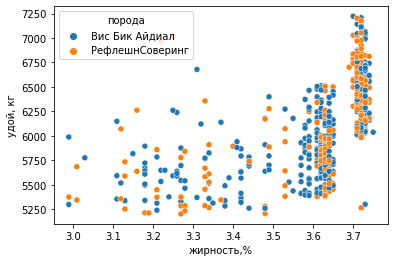

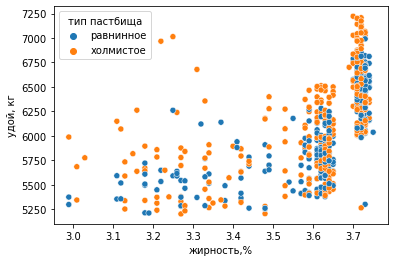

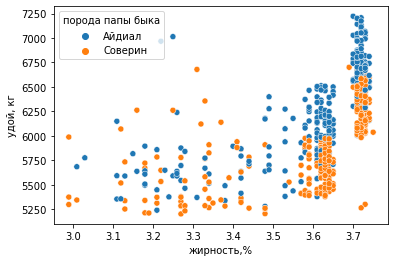

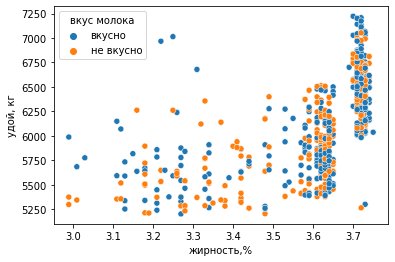

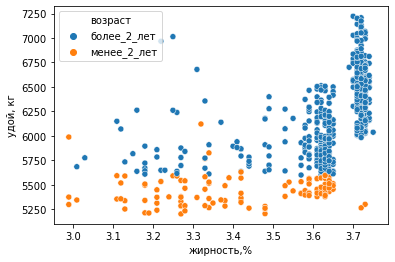

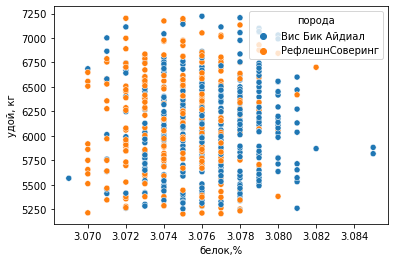

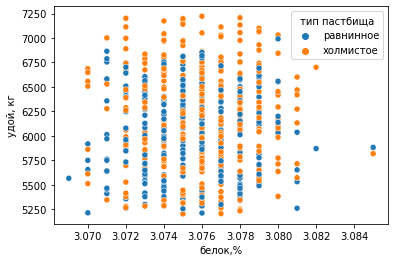

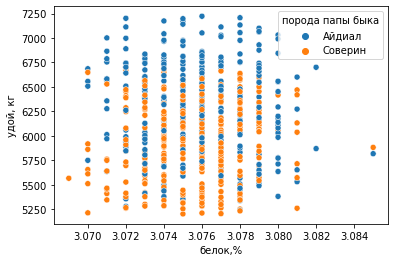

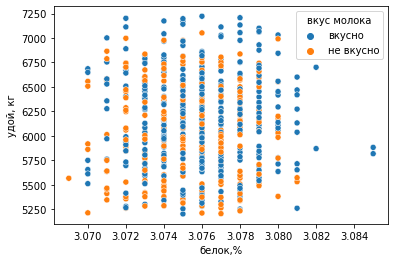

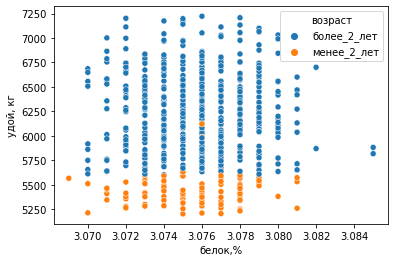

In [35]:
quantitative, categorical = distribution_by_data_types(ferma_main)

for q in quantitative:
    if q != 'удой, кг':
        for c in categorical:
            sns.scatterplot(data=ferma_main, x=q, y="удой, кг", hue = c)
            plt.show()

Просмотрев диаграммы рассеяния, можно сделать следующие выводы:
- **Зависимость удоя от эке**

Между этими двумя признаками прослеживается высокая зависимость по всем представленным категориям коров, представляющая из себя нечто среднее между линейной и квадратичной зависимостью. Если присмотреться, можно увидеть кривую, похожую на ветвь паработы - графика квадратичной функции. Стоит отметить, что для молодых буренок, то есть коров, возраст которых составляет менее 2 лет, значения удоя варьируются в пределах от 5250 до 6000 и эке в пределах от 12 до 15, в то время как для коров старше 2-х лет зависмость удоя от эке, определенно, ярко выражена.
- **Зависимость удоя от сырого протеина**

Мы можем увидеть очень слабую линейную зависимость. Точки диаграммы рассеяния очень хаотичны. Также снова стоит акцентировать внимание на возраст коров: коровы младше 2 лет дают меньше килограмм удоя, нежели более взрослые коровы. При дальнейшем рассмотрении диаграмм отсутствие влияние признаков на удой молодых коров будет заметно неоднократно, поэтому стоит зафиксировать этот факт.
- **Зависимость удоя от спо**

Наблюдается высокая зависимость, однако линейной ее назвать сложно. Чем больше спо в корме - тем больше кг молока даст корова. Наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами - 0.92. Чтобы устранить нелинейность, в дальнейшем преобразуем СПО в категориальный бинарный признак, использовав эту границу. Это может быть связано с тем, что могут существовать определенные стандарты по содержанию сахара в корме.
- **Зависимость удоя от жирности** 

Средняя и нелинейная. Большое количество точек сконцентрировано около значений жирности 3,6% и 3,7%. Как мы заметили в ходе исследовательского анализа, это наиболее распространенные проценты жирности. На удой коров, пасущихся на холмистых пастбищах, и удой коров породы Айдал жирность влияет сильнее, нежели на другие возможные значения этих категорий. А также молоко более взрослых коров содержит больший процент жирности, нежели молоко молодых коров.
- **Зависимость удоя от белка**

Полностью отсутсвует


Таким образом, стоило бы исключить столбцы с данными о содержании сырого протеина и количестве белка в молоке перед обучением модели. Также стоило бы подумать об исключении одного из столбцов: эке или спо, так как между этими входными признаками наблюдается сильная зависимость, то есть мультиколлинеарность.

## Обучение модели линейной регрессии

### Линенйая модель 1

In [36]:
ferma_main.columns

Index(['id', 'удой, кг', 'эке', 'сырой протеин, г', 'спо', 'порода',
       'тип пастбища', 'порода папы быка', 'жирность,%', 'белок,%',
       'вкус молока', 'возраст'],
      dtype='object')

Используем в качестве целевого признак `удой, кг`. Необходимо удалить столбец с данными об id коров, так как это никак не влияет на удой (влияют признаки каждой коровы, а не сам id) и входной признак, хранящий данные о процентном содержании белка, так как в ходе корреляционного анализа мы не обнаружили никакого влияния этого признака на целевой.

In [37]:
X_1 = ferma_main.drop(['id', 'удой, кг', 'белок,%', 'вкус молока'], axis=1)
X_1.columns

Index(['эке', 'сырой протеин, г', 'спо', 'порода', 'тип пастбища',
       'порода папы быка', 'жирность,%', 'возраст'],
      dtype='object')

In [38]:
y_1 = ferma_main['удой, кг']

In [39]:
def linear_regression_problem(X, y):
    RANDOM_STATE = 42
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE)
    
    num_col_names, cat_col_names = distribution_by_data_types(X)
    
    # Подготовка признаков (масштабирование и кодирование)
    
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    encoder_col_names = encoder.get_feature_names()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    # Обучение модели и получение предсказаний на тестовых данных
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)
    
    # Оценка качества модели: рассчитаем R² и проанализируйте остатки с помощью графиков
    r2 = r2_score(y_test, predictions)
    print(f'Коэффициент детерминации R^2 = {r2}')
    mae = mean_absolute_error(y_test, predictions)
    print(f'MAE = {mae}')
    mse = mean_squared_error(y_test, predictions)
    print(f'MSE = {mse}')
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE = {rmse}')

    # Проведем анализ остатков
    # Перед этим рассчитаем их
    residuals = y_test - predictions
    
    print(f'Доверительный интервал {st.norm.interval(0.95, loc=np.mean(predictions), scale=st.sem(predictions))}')

    # Построим графики по количественным признакам — гистограмму частотности 
    # распределения и диаграмму рассеяния
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(x=residuals, bins=20)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(x=predictions, y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    
    print(f'Коэффициенты линейной регрессии {model_lr.coef_}')

Коэффициент детерминации R^2 = 0.7840491770333317
MAE = 163.61998797909652
MSE = 43960.02161130168
RMSE = 209.66645323299022
Доверительный интервал (6103.727158521303, 6225.731273181299)


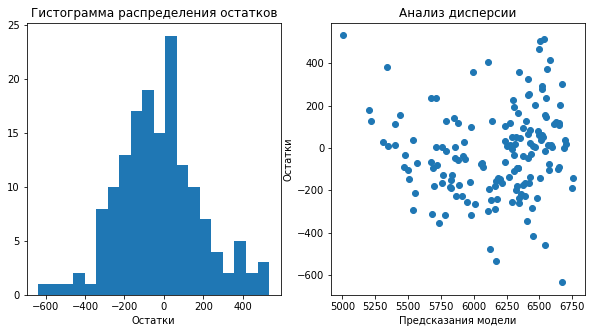

Коэффициенты линейной регрессии [  -1.32120438   55.78349486 -246.30268432 -223.91833069  146.72110484
   49.51847685  151.35144419   32.38071418]


In [40]:
linear_regression_problem(X_1, y_1)

Метрики качества носят неплохие показатели, но далеко не идеальные. Коэффициент детерминации R^2 = 0.78 показывает, что в 78% случаев предсказания модели ближе к истине, нежели к среднему значению целевого признака, то есть в 22% случаев все наоброт, а это не так мало. Гистограмма распредления остатков отображает распределние близкое к нормальному, однако остатки не стремятся к нулю, скорее наблюдается небольшое смещение вправо, а значит точность предсказания модели не совсем оптимальна. По анализу дисперсии можно сказать, что при больших значених предсказаний разброс ошибок немного увеличивается.

### Линенйая модель 2

Результаты метрик качества обученной ранее линейной модели дают нам толчок для ее совершенствования. Посмотрим на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. К ним относится - спо. Исключим нелинейность, чтобы эти признаки были информативны для линейной регрессии. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами - 0.92. Чтобы устранить нелинейность, в дальнейшем преобразуем СПО в категориальный бинарный признак, использовав эту границу: 0 - "низкое соотношение", 1 - "высокое соотношение"

In [41]:
df_2 = ferma_main.drop(['белок,%', 'вкус молока'], axis=1)
df_2.loc[df_2['спо'] < 0.92, ['спо']] = 0
df_2.loc[df_2['спо'] >= 0.92, ['спо']] = 1
df_2['спо'] = df_2['спо'].astype(int)

# Проверка
df_2.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%",возраст
0,1,5863,14.2,1743,0,Вис Бик Айдиал,равнинное,Айдиал,3.58,более_2_лет
1,2,5529,12.8,2138,0,Вис Бик Айдиал,равнинное,Соверин,3.54,менее_2_лет
2,3,5810,14.0,1854,0,РефлешнСоверинг,холмистое,Соверин,3.59,более_2_лет
3,4,5895,12.4,2012,0,РефлешнСоверинг,холмистое,Айдиал,3.40,более_2_лет
4,5,5302,12.8,1675,0,Вис Бик Айдиал,равнинное,Соверин,3.73,менее_2_лет


In [42]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   удой, кг          628 non-null    int64  
 2   эке               628 non-null    float64
 3   сырой протеин, г  628 non-null    int64  
 4   спо               628 non-null    int64  
 5   порода            628 non-null    object 
 6   тип пастбища      628 non-null    object 
 7   порода папы быка  628 non-null    object 
 8   жирность,%        628 non-null    float64
 9   возраст           628 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 54.0+ KB


Также можно обнаружить, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

In [43]:
df_2['эке'] = df_2['эке'] ** 2

# Проверка
df_2.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%",возраст
0,1,5863,201.64,1743,0,Вис Бик Айдиал,равнинное,Айдиал,3.58,более_2_лет
1,2,5529,163.84,2138,0,Вис Бик Айдиал,равнинное,Соверин,3.54,менее_2_лет
2,3,5810,196.00,1854,0,РефлешнСоверинг,холмистое,Соверин,3.59,более_2_лет
3,4,5895,153.76,2012,0,РефлешнСоверинг,холмистое,Айдиал,3.40,более_2_лет
4,5,5302,163.84,1675,0,Вис Бик Айдиал,равнинное,Соверин,3.73,менее_2_лет


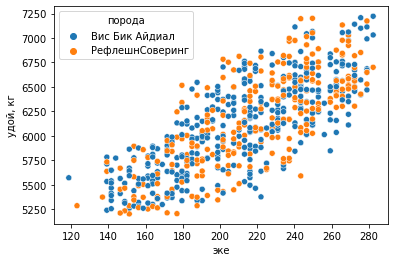

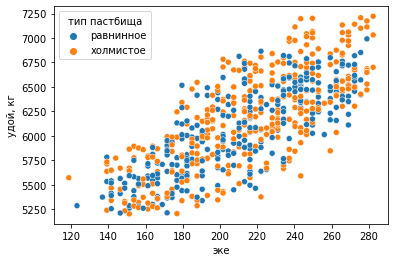

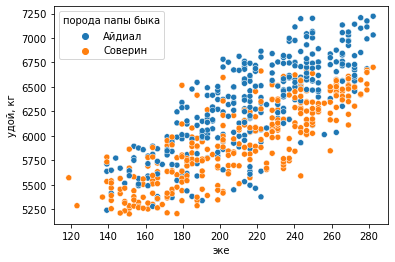

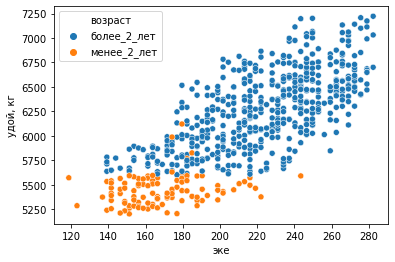

In [44]:
num_col_names, cat_col_names = distribution_by_data_types(df_2)

for c in cat_col_names:
    sns.scatterplot(data=df_2, x='эке', y="удой, кг", hue=c)
    plt.show()

In [45]:
X_2 = df_2.drop(['id', 'удой, кг'], axis=1)
X_2.columns

Index(['эке', 'сырой протеин, г', 'спо', 'порода', 'тип пастбища',
       'порода папы быка', 'жирность,%', 'возраст'],
      dtype='object')

In [46]:
y_2 = df_2['удой, кг']

Коэффициент детерминации R^2 = 0.8169747028551452
MAE = 148.2963080414545
MSE = 37257.53811618762
RMSE = 193.02211820459235
Доверительный интервал (6100.688848082418, 6226.539377063467)


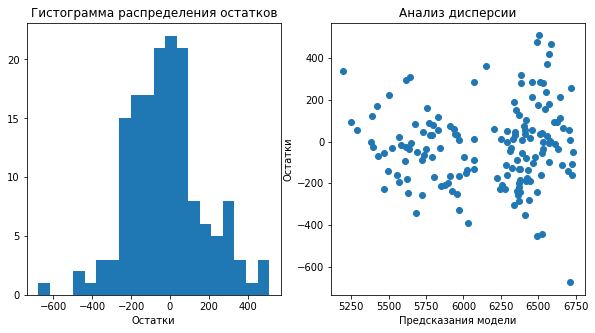

Коэффициенты линейной регрессии [   3.66016345   38.70887009 -217.94729034 -209.85812869  142.42802883
   47.3212098   176.95568228   33.03242949]


In [47]:
linear_regression_problem(X_2, y_2)

После выполненных над датасетом преобразований коэффициент детерминации увеличился на 2%. Гистограмма распредления имеет нормальный вид. Разброс остатков стал более равномерным.

### Линейная модель 3

3. Добавьте в данные новый признак и обучите на них третью модель `LinearRegression`.
    - Добавьте признак `Имя Папы` из файла `ferma_dad.csv`, соединив его с остальными данными `ferma_main.csv` по ключу.
    - Устраните нелинейность между признаками.
    - Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.

Добавим признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv

In [48]:
df_3 = df_2.merge(ferma_dad, how  = 'inner', on = 'id')
df_3.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%",возраст,имя папы
0,1,5863,201.64,1743,0,Вис Бик Айдиал,равнинное,Айдиал,3.58,более_2_лет,Буйный
1,2,5529,163.84,2138,0,Вис Бик Айдиал,равнинное,Соверин,3.54,менее_2_лет,Соловчик
2,3,5810,196.00,1854,0,РефлешнСоверинг,холмистое,Соверин,3.59,более_2_лет,Барин
3,4,5895,153.76,2012,0,РефлешнСоверинг,холмистое,Айдиал,3.40,более_2_лет,Буйный
4,5,5302,163.84,1675,0,Вис Бик Айдиал,равнинное,Соверин,3.73,менее_2_лет,Барин


interval columns not set, guessing: ['id', 'удой, кг', 'эке', 'сырой протеин, г', 'спо', 'жирность,%']


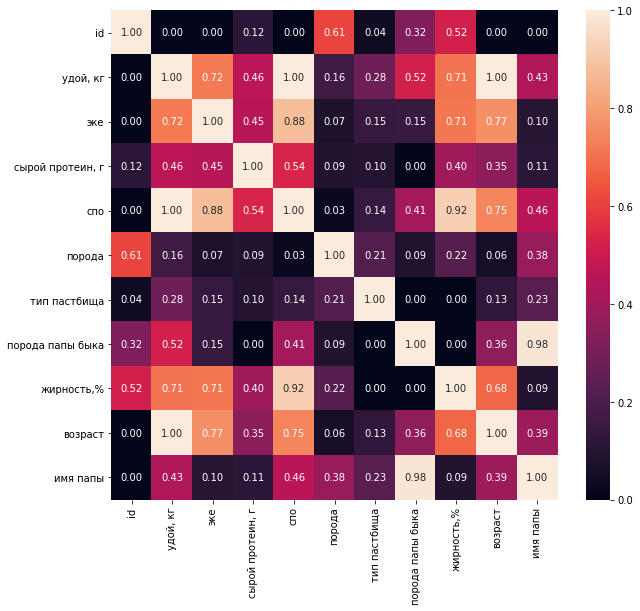

In [49]:
# Проведем корреляционный анализ
plt.figure(figsize=(10, 9))
sns.heatmap(df_3.phik_matrix(), annot=True, fmt='.2f')
plt.show()

Между признаками 'имя папы' и 'порода папы быка' наблюдается очень сильная линейная зависимость. Оба эти признака являются входными, а значит мы можем сказать о мультиколлинеарности. Поэтому удалим столбец с информацией о породе папы быка.

In [50]:
X_3 = df_3.drop(['id', 'удой, кг', 'порода папы быка'], axis=1)
X_3.columns

Index(['эке', 'сырой протеин, г', 'спо', 'порода', 'тип пастбища',
       'жирность,%', 'возраст', 'имя папы'],
      dtype='object')

In [51]:
y_3 = df_3['удой, кг']

Коэффициент детерминации R^2 = 0.824955750759291
MAE = 145.52797487654772
MSE = 35632.876382894596
RMSE = 188.76672477662635
Доверительный интервал (6091.847673730646, 6220.271628524066)


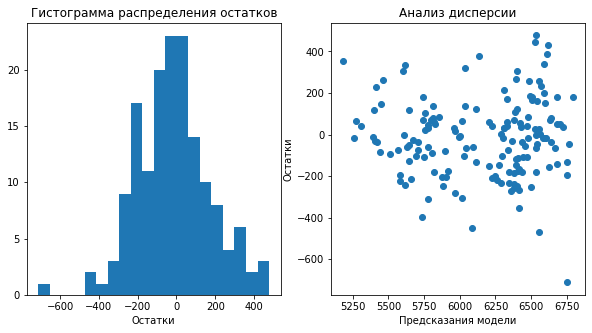

Коэффициенты линейной регрессии [  13.75000482   55.56023339 -177.89715911  268.22786728  298.69676396
   21.89417349  150.01079461   50.32028649  164.3228524    34.98860108]


In [52]:
linear_regression_problem(X_3, y_3)

Коэффициент детерминации R^2 = 0.82. Гистограмма распредления остатков отображает нормальное распределние, однако наблюдается небольшое смещение вправо. Разброс остатков, можно сказать, равномерен.

После оценки качества модели по трем метрикам: MSE, MAE, RMSE, самой лучшей моделью можно назвать модель под номером 3, так как она обладает большей точностью по всем этим метрикам. Для нее также был рассчитан доверительный интервал (6091.847673730646, 6220.271628524066)

### Прогнозирование удоя коров

In [53]:
cow_buy.head()

,порода,тип пастбища,порода папы быка,имя папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [54]:
# Готовим данные для прогнозирования
cow_buy['эке'] = (ferma_main['эке']**2).mean()*1.05
cow_buy['спо'] = ferma_main['спо'].mean()*1.05
cow_buy['сырой протеин, г'] = ferma_main['сырой протеин, г'].mean()*1.05
cow_buy.loc[cow_buy['спо'] < 0.92, ['спо']] = 0
cow_buy.loc[cow_buy['спо'] >= 0.92, ['спо']] = 1
cow_buy['спо'] = cow_buy['спо'].astype(int)
cow_buy.head()

,порода,тип пастбища,порода папы быка,имя папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке,спо,"сырой протеин, г"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,1,2019.947532
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.025225,1,2019.947532
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,1,2019.947532
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,224.025225,1,2019.947532
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,224.025225,1,2019.947532


In [55]:
cow_buy_1 = cow_buy.drop(['текущий_уровень_белок,%', 'порода папы быка'], axis=1)
cow_buy_1 = cow_buy_1.rename(columns={'текущая_жирность,%': 'жирность,%'})
cow_buy_1.head()

,порода,тип пастбища,имя папы,"жирность,%",возраст,эке,спо,"сырой протеин, г"
0,Вис Бик Айдиал,холмистое,Геркулес,3.58,более_2_лет,224.025225,1,2019.947532
1,Вис Бик Айдиал,равнинное,Буйный,3.54,менее_2_лет,224.025225,1,2019.947532
2,РефлешнСоверинг,равнинное,Барин,3.59,более_2_лет,224.025225,1,2019.947532
3,РефлешнСоверинг,холмистое,Буйный,3.40,более_2_лет,224.025225,1,2019.947532
4,РефлешнСоверинг,равнинное,Буйный,3.64,более_2_лет,224.025225,1,2019.947532


In [56]:
X_3.columns

Index(['эке', 'сырой протеин, г', 'спо', 'порода', 'тип пастбища',
       'жирность,%', 'возраст', 'имя папы'],
      dtype='object')

In [57]:
new_order = X_3.columns
cow_buy_1 = cow_buy_1.reindex(columns=new_order)
cow_buy_1.head()

,эке,"сырой протеин, г",спо,порода,тип пастбища,"жирность,%",возраст,имя папы
0,224.025225,2019.947532,1,Вис Бик Айдиал,холмистое,3.58,более_2_лет,Геркулес
1,224.025225,2019.947532,1,Вис Бик Айдиал,равнинное,3.54,менее_2_лет,Буйный
2,224.025225,2019.947532,1,РефлешнСоверинг,равнинное,3.59,более_2_лет,Барин
3,224.025225,2019.947532,1,РефлешнСоверинг,холмистое,3.40,более_2_лет,Буйный
4,224.025225,2019.947532,1,РефлешнСоверинг,равнинное,3.64,более_2_лет,Буйный


In [58]:
# Посмотрим на выбору, на которой проходило обучение
X_3.head()

,эке,"сырой протеин, г",спо,порода,тип пастбища,"жирность,%",возраст,имя папы
0,201.64,1743,0,Вис Бик Айдиал,равнинное,3.58,более_2_лет,Буйный
1,163.84,2138,0,Вис Бик Айдиал,равнинное,3.54,менее_2_лет,Соловчик
2,196.00,1854,0,РефлешнСоверинг,холмистое,3.59,более_2_лет,Барин
3,153.76,2012,0,РефлешнСоверинг,холмистое,3.40,более_2_лет,Буйный
4,163.84,1675,0,Вис Бик Айдиал,равнинное,3.73,менее_2_лет,Барин


In [59]:
print(distribution_by_data_types(X_3))

(['эке', 'сырой протеин, г', 'спо', 'жирность,%'], ['порода', 'тип пастбища', 'возраст', 'имя папы'])


In [60]:
print(distribution_by_data_types(cow_buy_1))

(['эке', 'сырой протеин, г', 'спо', 'жирность,%'], ['порода', 'тип пастбища', 'возраст', 'имя папы'])


In [61]:
RANDOM_STATE = 42

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, random_state=RANDOM_STATE)

# Определение числовых и категориальных признаков
num_col_names, cat_col_names = distribution_by_data_types(X_3)

# Подготовка признаков (масштабирование и кодирование)
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Обучение модели и получение предсказаний на тестовых данных
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [62]:
num_col_names, cat_col_names = distribution_by_data_types(cow_buy_1)

cow_buy_1_ohe = encoder.transform(cow_buy_1[cat_col_names])

encoder_col_names = encoder.get_feature_names()

cow_buy_1_scaled = scaler.transform(cow_buy_1[num_col_names])

cow_buy_1_ohe = pd.DataFrame(cow_buy_1_ohe, columns=encoder_col_names)
cow_buy_1_scaled = pd.DataFrame(cow_buy_1_scaled, columns=num_col_names)

cow_buy_1 = pd.concat([cow_buy_1_ohe, cow_buy_1_scaled], axis=1)
    
predictions_milk_yield = model_lr.predict(cow_buy_1)

In [63]:
# ВЫвод предсказанных значения 
predictions_milk_yield

array([6553.61374314, 6281.27328252, 6215.21029347, 6499.03107978,
       6493.95587505, 6344.42406976, 6553.61374314, 6465.48107021,
       6215.21029347, 6321.13392067, 6308.36429559, 6543.35665748,
       6574.64917175, 6043.3631343 , 6215.21029347, 6499.03107978,
       6308.36429559, 6373.87366981, 6417.09958441, 6493.95587505])

In [64]:
cow_buy['удой, кг'] = predictions_milk_yield
cow_buy

,порода,тип пастбища,порода папы быка,имя папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке,спо,"сырой протеин, г","удой, кг"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,1,2019.947532,6553.613743
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.025225,1,2019.947532,6281.273283
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,1,2019.947532,6215.210293
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,224.025225,1,2019.947532,6499.031080
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,224.025225,1,2019.947532,6493.955875
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,224.025225,1,2019.947532,6344.424070
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,1,2019.947532,6553.613743
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,224.025225,1,2019.947532,6465.481070
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,1,2019.947532,6215.210293
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,224.025225,1,2019.947532,6321.133921


Посмотрим, сколько коров попадают в доверительный интервал, то есть в диапазон между  (6091.544431935315, 6219.98479492416)

In [65]:
cow_buy.loc[cow_buy['удой, кг'] > 6091.847673730646, 'порода'].count()

19

## Обучение модели логистической регрессии

In [66]:
ferma_main.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


Возвращаясь к корреляционному анализу датасета, мы видим что вкус молока имеет слабую зависимость от спо и нулевую зависимость от процентного содержания белка.

In [67]:
df_4 = ferma_main.drop(['id', 'удой, кг', 'порода папы быка'], axis=1)
df_4.columns

Index(['эке', 'сырой протеин, г', 'спо', 'порода', 'тип пастбища',
       'жирность,%', 'белок,%', 'вкус молока', 'возраст'],
      dtype='object')

In [68]:
df_4.loc[df_4['спо'] < 0.92, ['спо']] = 0
df_4.loc[df_4['спо'] >= 0.92, ['спо']] = 1
df_4['спо'] = df_4['спо'].astype(int)

# Проверка
df_4.head()

,эке,"сырой протеин, г",спо,порода,тип пастбища,"жирность,%","белок,%",вкус молока,возраст
0,14.2,1743,0,Вис Бик Айдиал,равнинное,3.58,3.076,вкусно,более_2_лет
1,12.8,2138,0,Вис Бик Айдиал,равнинное,3.54,3.079,вкусно,менее_2_лет
2,14.0,1854,0,РефлешнСоверинг,холмистое,3.59,3.074,не вкусно,более_2_лет
3,12.4,2012,0,РефлешнСоверинг,холмистое,3.40,3.075,не вкусно,более_2_лет
4,12.8,1675,0,Вис Бик Айдиал,равнинное,3.73,3.073,вкусно,менее_2_лет


In [69]:
df_4['эке'] = df_4['эке'] ** 2

# Проверка
df_4.head()

,эке,"сырой протеин, г",спо,порода,тип пастбища,"жирность,%","белок,%",вкус молока,возраст
0,201.64,1743,0,Вис Бик Айдиал,равнинное,3.58,3.076,вкусно,более_2_лет
1,163.84,2138,0,Вис Бик Айдиал,равнинное,3.54,3.079,вкусно,менее_2_лет
2,196.00,1854,0,РефлешнСоверинг,холмистое,3.59,3.074,не вкусно,более_2_лет
3,153.76,2012,0,РефлешнСоверинг,холмистое,3.40,3.075,не вкусно,более_2_лет
4,163.84,1675,0,Вис Бик Айдиал,равнинное,3.73,3.073,вкусно,менее_2_лет


In [70]:
df_4['вкус молока'] = df_4['вкус молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
X_4 = df_4.drop('вкус молока', axis=1)
y_4 = df_4['вкус молока']

y_4.head()

0    1
1    1
2    0
3    0
4    1
Name: вкус молока, dtype: int64

In [71]:
# Обучение модели
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X_4, 
    y_4, 
    random_state=RANDOM_STATE)
    
num_col_names, cat_col_names = distribution_by_data_types(X_4)
    
# Подготовка признаков (масштабирование и кодирование)
    
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [72]:
# Обучение модели и получение предсказаний на тестовых данных
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

`# Сколько значений "вкусно" предсказано
y_pred[y_pred == 'вкусно'].size`

In [73]:
# Сколько значений "вкусно" предсказано
y_pred[y_pred == 1].size

120

In [74]:
clf.coef_

array([[ 0.0902595 ,  0.52306786, -0.24394375,  0.61268196,  0.14383195,
        -0.36080552, -0.02727097,  0.27224059]])

In [75]:
def metric(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print(f'accuracy {acc}')
    recall = recall_score(y_test, y_pred)
    print(f'recall {recall}')
    precision = precision_score(y_test, y_pred)
    print(f'precision {precision}')

In [76]:
metric(y_test, y_pred)

accuracy 0.643312101910828
recall 0.8636363636363636
precision 0.6333333333333333


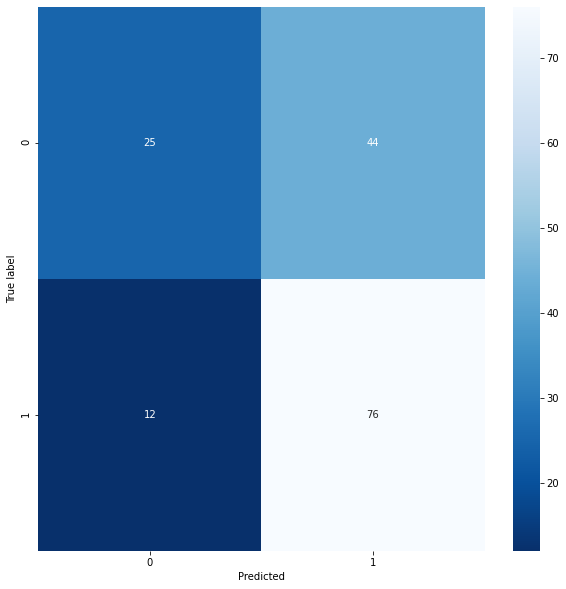

In [77]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

По результат рассчета метрик accuracy, можно скзать, что модель логистической регрессии в ~64% случаев верно опрделяет класс объекта, однако при этом не учитывается как часто она правильно определяет каждый конкретный класс. Благодаря метрике recall мы понимаем, что в 86% случаев модель правильно опрделяет первый класс, а по метрике precision видим, что в 63% случаев модель присваивает объектам класс 1 верно.

Наша цель - отобрать буренок со вкусным молоком. При таком раскладе для нас более критична ошибка рода 1-го рода. Нам необходимо минимизировать ее и увеличить процент TruePositive. Для этого нам необходимо изменить порог принадлежности классам.

In [78]:
y_proba = clf.predict_proba(X_test)[:, 1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

data.head()

,y_valid,y_proba
85,1,0.845210
66,1,0.831889
51,1,0.831527
146,1,0.828097
110,1,0.825277


In [79]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 25,endpoint=False)]

values = []
columns = []
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>= i else 0)

data.sort_values(by='y_proba',ascending=False).head()

,y_valid,y_proba,y_pred_0.1,y_pred_0.14,y_pred_0.17,y_pred_0.21,y_pred_0.24,y_pred_0.28,y_pred_0.32,y_pred_0.35,...,y_pred_0.64,y_pred_0.68,y_pred_0.71,y_pred_0.75,y_pred_0.78,y_pred_0.82,y_pred_0.86,y_pred_0.89,y_pred_0.93,y_pred_0.96
85,1,0.845210,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
66,1,0.831889,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
51,1,0.831527,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
146,1,0.828097,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
110,1,0.825277,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0


In [80]:
precision = []
limit = []

for i in thresholds:
    limit.append('y_pred_'+str(i))
    precision.append(precision_score(data['y_valid'], data['y_pred_'+str(i)]))

data_porog = pd.DataFrame(zip(limit, precision),
             columns = ['порог', 'precision'])
             
data_porog

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined a

,порог,precision
0,y_pred_0.1,0.560510
1,y_pred_0.14,0.560510
2,y_pred_0.17,0.560510
3,y_pred_0.21,0.560510
4,y_pred_0.24,0.564103
5,y_pred_0.28,0.564103
6,y_pred_0.32,0.576159
7,y_pred_0.35,0.564626
8,y_pred_0.39,0.570423
9,y_pred_0.42,0.572464


Для минимизации ошибки первого рода пороговое значение должно быть равно 0.82.

In [81]:
# Подготовленный датасет
cow_buy_2 = cow_buy
cow_buy_2.head()

,порода,тип пастбища,порода папы быка,имя папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке,спо,"сырой протеин, г","удой, кг"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,1,2019.947532,6553.613743
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.025225,1,2019.947532,6281.273283
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,1,2019.947532,6215.210293
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,224.025225,1,2019.947532,6499.031080
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,224.025225,1,2019.947532,6493.955875


In [82]:
cow_buy_2 = cow_buy_2.drop(['удой, кг', 'порода папы быка'], axis=1)
cow_buy_2 = cow_buy_2.rename(columns={'текущая_жирность,%': 'жирность,%', 'текущий_уровень_белок,%': 'белок,%'})
cow_buy_2.head()

,порода,тип пастбища,имя папы,"жирность,%","белок,%",возраст,эке,спо,"сырой протеин, г"
0,Вис Бик Айдиал,холмистое,Геркулес,3.58,3.076,более_2_лет,224.025225,1,2019.947532
1,Вис Бик Айдиал,равнинное,Буйный,3.54,3.081,менее_2_лет,224.025225,1,2019.947532
2,РефлешнСоверинг,равнинное,Барин,3.59,3.074,более_2_лет,224.025225,1,2019.947532
3,РефлешнСоверинг,холмистое,Буйный,3.40,3.061,более_2_лет,224.025225,1,2019.947532
4,РефлешнСоверинг,равнинное,Буйный,3.64,3.074,более_2_лет,224.025225,1,2019.947532


In [83]:
X_4.columns

Index(['эке', 'сырой протеин, г', 'спо', 'порода', 'тип пастбища',
       'жирность,%', 'белок,%', 'возраст'],
      dtype='object')

In [84]:
new_order = X_4.columns
cow_buy_2 = cow_buy_2.reindex(columns=new_order)
cow_buy_2.head()

,эке,"сырой протеин, г",спо,порода,тип пастбища,"жирность,%","белок,%",возраст
0,224.025225,2019.947532,1,Вис Бик Айдиал,холмистое,3.58,3.076,более_2_лет
1,224.025225,2019.947532,1,Вис Бик Айдиал,равнинное,3.54,3.081,менее_2_лет
2,224.025225,2019.947532,1,РефлешнСоверинг,равнинное,3.59,3.074,более_2_лет
3,224.025225,2019.947532,1,РефлешнСоверинг,холмистое,3.40,3.061,более_2_лет
4,224.025225,2019.947532,1,РефлешнСоверинг,равнинное,3.64,3.074,более_2_лет


In [85]:
X_4.head()

,эке,"сырой протеин, г",спо,порода,тип пастбища,"жирность,%","белок,%",возраст
0,201.64,1743,0,Вис Бик Айдиал,равнинное,3.58,3.076,более_2_лет
1,163.84,2138,0,Вис Бик Айдиал,равнинное,3.54,3.079,менее_2_лет
2,196.00,1854,0,РефлешнСоверинг,холмистое,3.59,3.074,более_2_лет
3,153.76,2012,0,РефлешнСоверинг,холмистое,3.40,3.075,более_2_лет
4,163.84,1675,0,Вис Бик Айдиал,равнинное,3.73,3.073,менее_2_лет


In [86]:
num_col_names, cat_col_names = distribution_by_data_types(cow_buy_2)

cow_buy_2_ohe = encoder.transform(cow_buy_2[cat_col_names])

encoder_col_names = encoder.get_feature_names()

cow_buy_2_scaled = scaler.transform(cow_buy_2[num_col_names])

cow_buy_2_ohe = pd.DataFrame(cow_buy_2_ohe, columns=encoder_col_names)
cow_buy_2_scaled = pd.DataFrame(cow_buy_2_scaled, columns=num_col_names)

cow_buy_2 = pd.concat([cow_buy_2_ohe, cow_buy_2_scaled], axis=1)

In [87]:
predictions_taste = clf.predict_proba(cow_buy_2)[:, 1]
predictions_taste = [1 if x >= 0.82 else 0 for x in predictions_taste]

Ошибки первого рода были устранены.

In [88]:
predictions_taste = ['вкусно' if x == 1 else 'не вкусно' for x in predictions_taste]
predictions_taste

['не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно',
 'не вкусно']

## Итоговые выводы

In [89]:
cow_buy['вкус молока'] = predictions_taste
cow_buy

,порода,тип пастбища,порода папы быка,имя папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке,спо,"сырой протеин, г","удой, кг",вкус молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,1,2019.947532,6553.613743,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,224.025225,1,2019.947532,6281.273283,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,1,2019.947532,6215.210293,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,224.025225,1,2019.947532,6499.031080,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,224.025225,1,2019.947532,6493.955875,не вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,224.025225,1,2019.947532,6344.424070,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,224.025225,1,2019.947532,6553.613743,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,224.025225,1,2019.947532,6465.481070,не вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,224.025225,1,2019.947532,6215.210293,не вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,224.025225,1,2019.947532,6321.133921,не вкусно


Перед нами стояла задача помочь фермеру выбрать буренок для расширения поголовья стада. Главными условиями покупки коровы является удой не менее 6000 килограмм в год, а также соответствие надоя строгим критериям - он должен быть вкусным!

Нам были предоставлены данные о коровах ассоциации пастбищ «ЭкоФерма», с которыми фермер заключил выгодный контракт, данные о уже имеющихся коровках, а также об их отцах.

В ходе выполнения работы была выполнена предобработка данных: изучена общая информация о каждом из трех датасетов, устранены полные явные и неявные дубликаты, стиль написания столбцов и данных был приведен к единому формату. 

Затем был проведен исследовательский анализ, в ходе которого были ликвидированы выбросы и артефакты, а также изучено распределение данных. После этого последовал корреляционный анализ данных, по итогу которого были сделаны следующие выводы:
1. Целевой признак - удой, кг - имеет высокую зависимость от эке и спо, среднюю зависимость от жирности, низкую зависимость от сырого протеина
2. ЭКЕ (Энергетическая кормовая единица) имеет: высокую зависимость от спо, то есть, фактически, прямую зависимость от сахара в корме коровы, слабую зависимость от сырого протеина
3. Сырой протеин, г имеет слабые зависимости от других входных признаков.
4. СПО имеет слабую зависимость от сырого протена, г.
5. Жирность,%, то есть содержание жиров в молоке (в процентах), имеет среднюю зависимость от ЭКЕ и СПО.
6. Белки, в свою очередь, не зависят ни от чего, то есть не имеют линейных связей.
7. Мультиколлинеарность не наблюдается.

Просмотрев диаграммы рассеяния были определены признаки, обладающей линейной и нелинейной зависимость:

- Зависимость удоя от эке

Между этими двумя признаками прослеживается высокая линейная зависимость по всем представленным категориям коров. Однако стоит отметить, что для молодых буренок, то есть коров, возраст которых составляет менее 2 лет, как таковой линеной зависимость нет, а значения удоя варьируются в пределах от 5250 до 6000 и эке в пределах от 12 до 15, в то время как для коров старше 2-х лет зависмость удоя от эке, определенно, ярко выражена.
- Зависимость удоя от сырого протеина

Мы можем увидеть очень слабую линейную зависимость. Точки диаграммы рассеяния очень хаотичны. Также снова стоит акцентировать внимание на возраст коров: коровы младше 2 лет дают меньше килограмм удоя, нежели более взрослые коровы. При дальнейшем рассмотрении диаграмм отсутствие влияние признаков на удой молодых коров будет заметно неоднократно, поэтому стоит зафиксировать этот факт.
- Зависимость удоя от спо

Наблюдается высокая зависимость, однако линейной ее назвать сложно. Чем больше спо в корме - тем больше кг молока даст корова. Наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами - 0.92. Чтобы устранить нелинейность, в дальнейшем преобразуем СПО в категориальный бинарный признак, использовав эту границу. Это может быть связано с тем, что могут существовать определенные стандарты по содержанию сахара в корме.
- Зависимость удоя от жирности 

Средняя и нелинейная. Большое количество точек сконцентрировано около значений жирности 3,6% и 3,7%. Как мы заметили в ходе исследовательского анализа, это наиболее распространенные проценты жирности. На удой коров, пасущихся на холмистых пастбищах, и удой коров породы Айдал жирность влияет сильнее, нежели на другие возможные значения этих категорий. А также молоко более взрослых коров содержит больший процент жирности, нежели молоко молодых коров.
- Зависимость удоя от белка

Полностью отсутсвует

После проделанных шагов были отсеяны данные, не влияющие на предсказания моделей линейной и логистической регрессии. 

После всех вышеперечисленных этапов и итогов мы приступили к решениям задач регрессии и классификации. Было начато обучение двух прогнозных модели для отбора бурёнок, которые помогают управлять рисками и принимать объективное решение о покупке:
- Модель линейной регрессии 

Было обучено три модели линейной регрессии с разным наборами и типами данных: некоторые количественные признаки были изменены на категориальные, были добавлены новые столбцы и т.д. В конечном итоге мы добились модели с наиболее точными предсказаниями - модель под номером 3, согласно метрикам качества.
- Модель логистической регрессии

При анализе рисков или экономических расчётов важны такие метрики моделей классификации, в том числе логистической регрессии, как:
- Accuracy (Точность):

Доля правильных предсказаний среди всех предсказаний. Метрика accuracy не всегда позволяет оценить, насколько конкретная модель применима к задаче. Она не учитывает как часто модель правильно определяет каждый конкретный класс. 
- Precision (Точность):

Отвечает за ошибки первого рода. Эта метрика показывает точность, с которой модель присваивает объектам класс 1, то есть получает результат типа Positive. Иными словами, precision определяет, не слишком ли часто модель выставляет класс 1 объектам класса 0. Чем выше эта метрика, тем меньше таких случаев. 
- Recall (Полнота):

Отвечает за ошибки второго рода. Метрика, обратная precision — recall. На русском языке её называют полнотой. Она измеряет, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. Предсказания False Negative рассматриваются метрикой как «неучтённые» True Positive. Чем выше recall, тем больше прогнозов Positive модель смогла дать верно. 

В ходе обучения модели логистической регрессии были проведены эксперементы с порогами принадлежности, поиск нужного порода. Нашей целью при этом была минимизация ошибок precision, то есть минимизация значений, которым был присвоен класс "вкусно" неверно - мы занимались  устранением ошибок первого рода. 

Возможно, результаты регрессионной модели можео было бы улучшить, добавив в датасет новые входные признаки, например климатические условия содержания или физиологические особенности коровы (масса, ширина костей таза и т.д.).

По результатам проведенных исследований было выяснено, что ни одна из коровок, предложенных на продаже фермеру ассоциацией пастбищ, не подходит ему по одному из главных критериев - ни у одной коровы молоко вкусным не является. В связи с этим рекомендуется расторгнуть договор с "Экофермой" и поискать более надежного поставщика буренок.